Importando abase de dados 

#### Usando a biblioteca "yfinance" pois a pandas_datareader não tem mais suporte para os dados financeiros disponiveis no Yahoo

In [56]:

# Baixando os dados da Procter & Gamble (PG) a partir de 1995
PG = yf.download('import yfinance as yf
PG', start='1995-01-01')
print(PG.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker            PG        PG        PG        PG       PG
Date                                                       
1995-01-03  7.441168  7.456080  7.366608  7.381520  3318400
1995-01-04  7.381518  7.470991  7.306958  7.411343  2218800
1995-01-05  7.277132  7.366605  7.262220  7.336781  2319600
1995-01-06  7.292044  7.351692  7.232395  7.232395  3438000
1995-01-09  7.262220  7.351693  7.247308  7.321869  1795200


Abaixo, uma breve esposição da base de dados

In [8]:
PG

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1995-01-03,7.441165,7.456078,7.366605,7.381517,3318400
1995-01-04,7.381516,7.470989,7.306956,7.411341,2218800
1995-01-05,7.277134,7.366607,7.262222,7.336783,2319600
1995-01-06,7.292042,7.351690,7.232393,7.232393,3438000
1995-01-09,7.262216,7.351689,7.247304,7.321865,1795200
...,...,...,...,...,...
2024-12-20,168.059998,169.869995,167.500000,168.869995,21999300
2024-12-23,168.110001,168.679993,166.360001,168.059998,6983900


Se preferivel, pode visualizar a o data frame utilizando os comandos abaixo. 

In [9]:
PG.head()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1995-01-03,7.441165,7.456078,7.366605,7.381517,3318400
1995-01-04,7.381516,7.470989,7.306956,7.411341,2218800
1995-01-05,7.277134,7.366607,7.262222,7.336783,2319600
1995-01-06,7.292042,7.351690,7.232393,7.232393,3438000
1995-01-09,7.262216,7.351689,7.247304,7.321865,1795200


Abaixo para saber quando a base de dados termina. Ou seja, tem dados disponiveis ate o dia 20/12/2024. Caso eu faça uma atualização, provavelmente, terão dados todas os dias atualizados. 

In [10]:
PG.tail()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
2024-12-20,168.059998,169.869995,167.500000,168.869995,21999300
2024-12-23,168.110001,168.679993,166.360001,168.059998,6983900
2024-12-24,168.940002,169.179993,167.419998,167.619995,2460800
2024-12-26,170.160004,170.300003,168.070007,168.309998,3629400
2024-12-27,169.529999,170.759995,169.259995,169.419998,4362200


Outra forma de baixar os dados é por mais de uma ação. Neste caso, usaremos PG, MSFT, T, F e GE. 

In [5]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros

tickers = ['PG', 'MSFT', 'T', 'F', 'GE']
new_data = pd.DataFrame()

for t in tickers:
    new_data[t] = yf.download(t, start='1995-01-01')['Close']  # Apenas o preço de fechamento

print(new_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG      MSFT         T         F         GE
Date                                                         
1995-01-03  7.441165  2.319454  2.369481  3.569731  20.200661
1995-01-04  7.381517  2.336314  2.363453  3.665777  20.200661
1995-01-05  7.277132  2.297776  2.400381  3.633764  20.250164
1995-01-06  7.292045  2.336314  2.400381  3.633764  20.151138
1995-01-09  7.262225  2.321861  2.392997  3.697795  19.953106


Agora vamos ve até quando tem dados dessas ações.

In [6]:
new_data.tail()

,PG,MSFT,T,F,GE
Date,,,,,
2024-12-20,168.059998,436.600006,22.750000,9.88,168.096146
2024-12-23,168.110001,435.250000,22.840000,9.90,168.745102
2024-12-24,168.940002,439.329987,22.950001,10.02,171.211075
2024-12-26,170.160004,438.109985,22.959999,10.07,171.869995
2024-12-27,169.529999,430.529999,22.860001,10.03,170.080002


### Agora vamos calcular a taxa de retorno de um ativo.

### Cálculo da Taxa Simples de Retorno

A fórmula para calcular a taxa simples de retorno (\(R_t\)) é:

\[
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
\]

Ou de forma equivalente:

\[
R_t = \frac{P_t}{P_{t-1}} - 1
\]

#### Variáveis:
- \(R_t\): Taxa de retorno no período \(t\);
- \(P_t\): Preço do ativo no final do período \(t\);
- \(P_{t-1}\): Preço do ativo no início do período \(t\).

#### Exemplo:
Se o preço de um ativo era \(P_{t-1} = 100\) e subiu para \(P_t = 110\):

\[
R_t = \frac{110 - 100}{100} = 0,10 \, \text{(ou 10\%)}
\]



É bom saber o nome das colunas, para aplicar a formula corretamente. 

In [12]:
print(PG.columns)


MultiIndex([( 'Close', 'PG'),
            (  'High', 'PG'),
            (   'Low', 'PG'),
            (  'Open', 'PG'),
            ('Volume', 'PG')],
           names=['Price', 'Ticker'])


In [58]:
PG['simple_return'] = PG['Close'] / PG['Close'].shift(1) - 1
print(PG['simple_return'])


Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2024-12-20   -0.006679
2024-12-23    0.000298
2024-12-24    0.004937
2024-12-26    0.007222
2024-12-27   -0.003702
Name: simple_return, Length: 7550, dtype: float64


Agora vamos analisar o grafico da taxa de retorno nesta ação.

<Axes: xlabel='Date'>

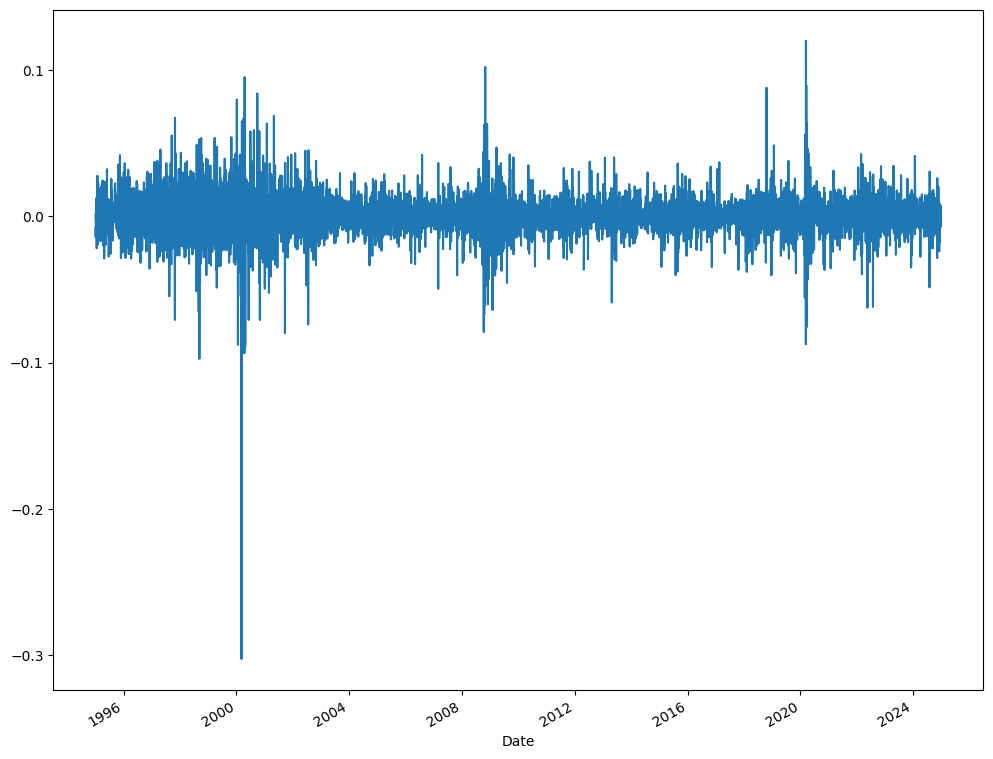

In [17]:
PG ['simple_return'].plot(figsize=(12,10))


Agora vamos calcular a taxa média de retorno

In [59]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005104683065018642

### Calcular a taxa media anual agora

In [60]:
avg_returns_a = PG['simple_return'].mean () *250
avg_returns_a

0.12761707662546604

Essa taxa não está definida em porcentagem. Vamos calcular para plotar os dados em porcentagem

In [54]:
print(str(round(avg_returns_a, 5) * 100) + '%')


12.762%


### Agora vamos calcular a taxa log de retorno


In [62]:


PG['log_return'] = np.log(PG['Close'] / PG['Close'].shift(1))
print(PG['log_return'].head())



Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
Name: log_return, dtype: float64


Confirmação da criação da taxa LOG. 

In [63]:
PG.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,PG,PG,PG,PG,PG,,
Date,,,,,,,
1995-01-03,7.441167,7.456079,7.366606,7.381518,3318400,NaN,NaN
1995-01-04,7.381516,7.470989,7.306956,7.411341,2218800,-0.008016,-0.008049
1995-01-05,7.277133,7.366606,7.262221,7.336782,2319600,-0.014141,-0.014242
1995-01-06,7.292043,7.351691,7.232394,7.232394,3438000,0.002049,0.002047
1995-01-09,7.262218,7.351690,7.247305,7.321866,1795200,-0.004090,-0.004098


<Axes: xlabel='Date'>

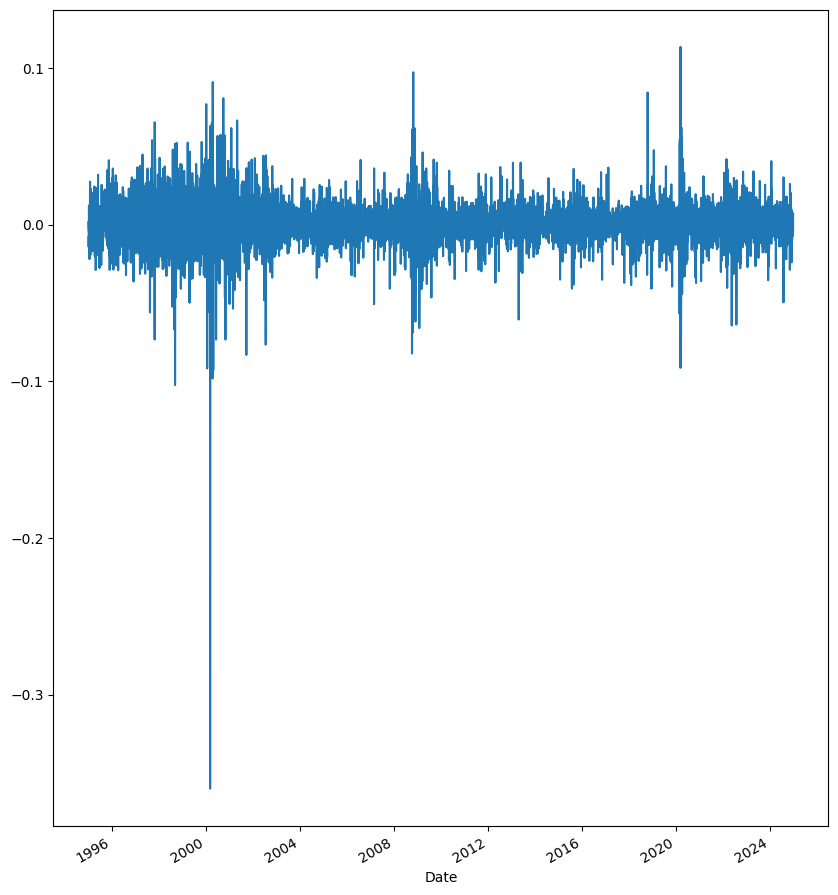

In [64]:
PG['log_return'].plot(figsize=(10,12))

In [65]:
log_return_d = PG['log_return'].mean
log_return_d

<bound method NDFrame._add_numeric_operations.<locals>.mean of Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2024-12-20   -0.006701
2024-12-23    0.000297
2024-12-24    0.004925
2024-12-26    0.007196
2024-12-27   -0.003709
Name: log_return, Length: 7550, dtype: float64>

In [67]:
log_return_a = PG['log_return'].mean()*250
log_return_a

0.10352371904078018

In [69]:
print(str(round(log_return_a, 5) * 100) + '%')


10.352%


Nos casos acima,  consideramos o investidor que tem apenas uma ação, porem, isso raramente acontece, vamos analisar agora o que acontece com a carteira de um investidor que tem mais de uma ação. 

Vamos utilizar a base de dados já baixada anteriormentente. 

A base de dados são das seguintes empresas: Procter & Gamble, Microsoft, Ford, General Electric

In [75]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros
import numpy as np
import matplotlib.pyplot as plt

tickers = ['PG', 'MSFT', 'F', 'GE']
new_data = pd.DataFrame()

for t in tickers:
    new_data[t] = yf.download(t, start='1995-01-01')['Close']  # Apenas o preço de fechamento

print(new_data.head())

#Nome new_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG      MSFT         F         GE
Date                                               
1995-01-03  7.441164  2.319453  3.569734  20.200661
1995-01-04  7.381521  2.336314  3.665778  20.200661
1995-01-05  7.277134  2.297776  3.633765  20.250174
1995-01-06  7.292047  2.336314  3.633765  20.151150
1995-01-09  7.262218  2.321861  3.697793  19.953110


In [76]:
new_data

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.441164,2.319453,3.569734,20.200661
1995-01-04,7.381521,2.336314,3.665778,20.200661
1995-01-05,7.277134,2.297776,3.633765,20.250174
1995-01-06,7.292047,2.336314,3.633765,20.151150
1995-01-09,7.262218,2.321861,3.697793,19.953110
...,...,...,...,...
2024-12-23,168.110001,435.250000,9.900000,168.745102
2024-12-24,168.940002,439.329987,10.020000,171.211075
2024-12-26,170.160004,438.109985,10.070000,171.869995


Primeiro vamos criar um grafico de linhas para analisar os dados. 
A fórmula para normalizar os dados é:

\[
\text{Valor Normalizado} = \left( \frac{P_1}{P_0} \right) \times 100
\]

Onde:
- \( P_1 \) é o valor atual.
- \( P_0 \) é o valor inicial.


O indexador "iloc[0]" extrai os primeiros dados das tabelas. 

In [77]:
new_data.iloc[0]

PG       7.441164
MSFT     2.319453
F        3.569734
GE      20.200661
Name: 1995-01-03 00:00:00, dtype: float64

Agora podemos aplicar a formular para normalizar os dados

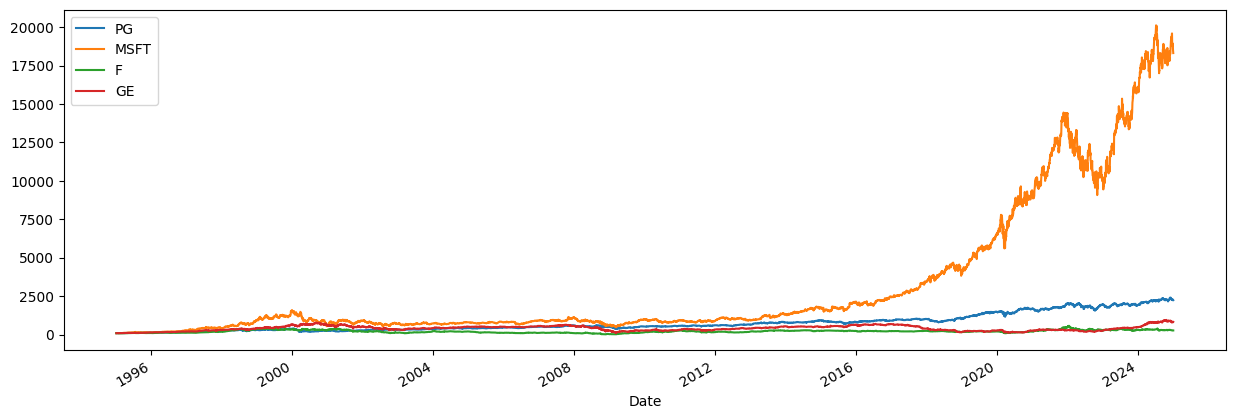

In [83]:

# Normalizar os dados (divide por o primeiro valor e multiplica por 100)
(new_data / new_data.iloc[0] * 100).plot(figsize=(15, 5))

# Mostrar o gráfico
plt.show()


Agora vamos camparar elas sem está normalizadas. Para vemos a diferença, vale lembrar que é melhor analisar as carteiras normalizadas. Então o exemplo é o qualificado para a analise dessas ações. 

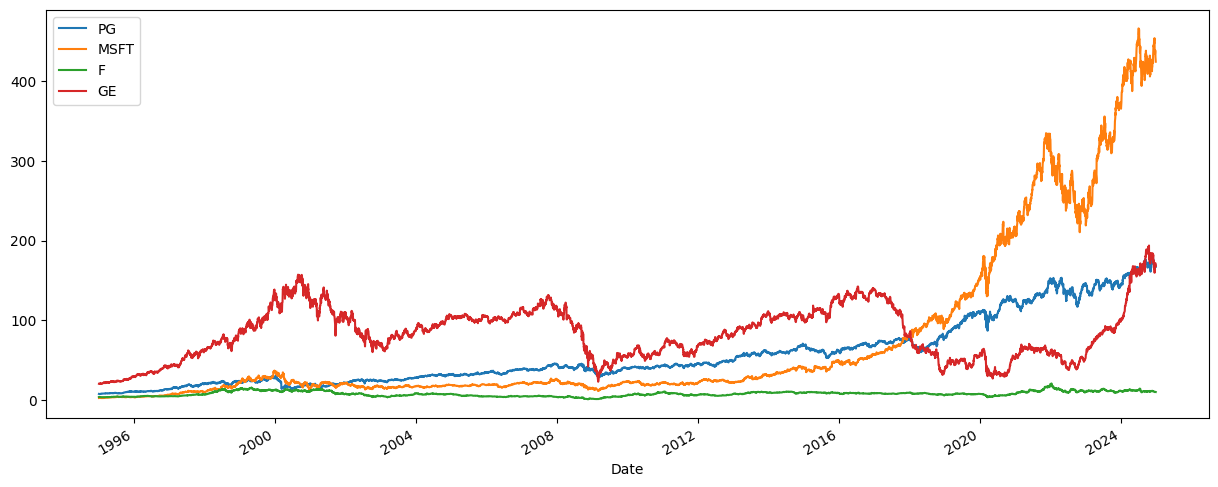

In [84]:
new_data.plot(figsize= (15,6))
plt.show()

Agora vamos calcular o retorno simples dessas ações.

In [85]:
txreturns = (new_data / new_data.shift(1)) - 1
txreturns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004091,-0.006186,0.017620,-0.009828


Colocando os pesos

Vamos assumir pesos iguais paras as ações, ou seja, cada ação representa 25% da carteira. 

In [86]:
weights = np.array([0.25, 0.25, 0.25,0.25])

Vamos multiplicar o preço de cada ação pelo peso de cada retorno.

In [88]:
np.dot (txreturns, weights)

array([        nan,  0.00653982, -0.00922968, ...,  0.00332077,
       -0.00884775, -0.01355723])

O resultado não saiu da forma que pode ser averiguada.

Calculando a taxa de retorno anual das ações. 
Lembrando que tiramos a média das ações e multiplicamos pelos provaveis dias uteis no ano. 

In [94]:
annual_return =  txreturns.mean () * 250
annual_return

PG      0.127124
MSFT    0.220376
F       0.113791
GE      0.120894
dtype: float64

In [93]:
np.dot(annual_return,weights)

0.1455462277560205

Calculo do retorno do portifólio

In [92]:
pfolio_1 = str(round(np.dot(annual_return, weights), 5) * 100) + '%'
print(pfolio_1)


14.555000000000001%


Caso queira comparar com outras pesos, basta analisar por pesos diferentes. E assim comparar seus resultados. 

In [95]:
weights_2 = np.array([0.4,0.4, 0.15,0.05])

In [97]:
pfolio_2 = str(round(np.dot(annual_return,weights_2), 5 ) *100) + '%'
print (pfolio_1)
print (pfolio_2)

14.555000000000001%
16.211000000000002%


: 

Agora vamos calcular a taxa de retornos dos indices de ações.

Vamos usar outras açõe para calcular estes índices. Desta vez usaremos: GSPC, IXIC, GDAXI e FTSE.

Ou seja, açõe do S&P500, da Nasdaq, do Indice Alemão DAX e da Nasdaq de Londres.

Lembrando que o acento cincunflexo é usado antes de cada Sigla, indicando ser indice de ações. 

Vamos extrair valores dos ultimos 29 anos, logo a série vai começar em 1995

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = yf.download(t,start = '1995-01-01')['Close'] #Lembrete, apenas o preço de fechamento. 

print(ind_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 ^GSPC       ^IXIC       ^GDAXI        ^FTSE
Date                                                        
1995-01-03  459.109985  743.580017  2068.919922  3065.699951
1995-01-04  460.709991  745.840027  2072.899902  3051.600098
1995-01-05  460.339996  745.659973  2051.459961  3032.300049
1995-01-06  460.679993  749.690002  2058.199951  3065.000000
1995-01-09  460.829987  752.090027  2053.409912  3055.800049


Verificar as primeiras linhas e as ultimas linhas do data frame.

In [4]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049


In [5]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-12-23,5974.069824,19764.880859,19848.769531,8102.700195
2024-12-24,6040.040039,20031.130859,NaN,8137.000000
2024-12-26,6037.589844,20020.359375,NaN,NaN
2024-12-27,5970.839844,19722.029297,19984.320312,8149.799805
2024-12-30,5906.939941,19486.785156,19909.140625,8121.009766


Mais uma vez, o indice será normalizado para a base 100.

A Nasdaq é composta principalemnte por empresas de teconologia.

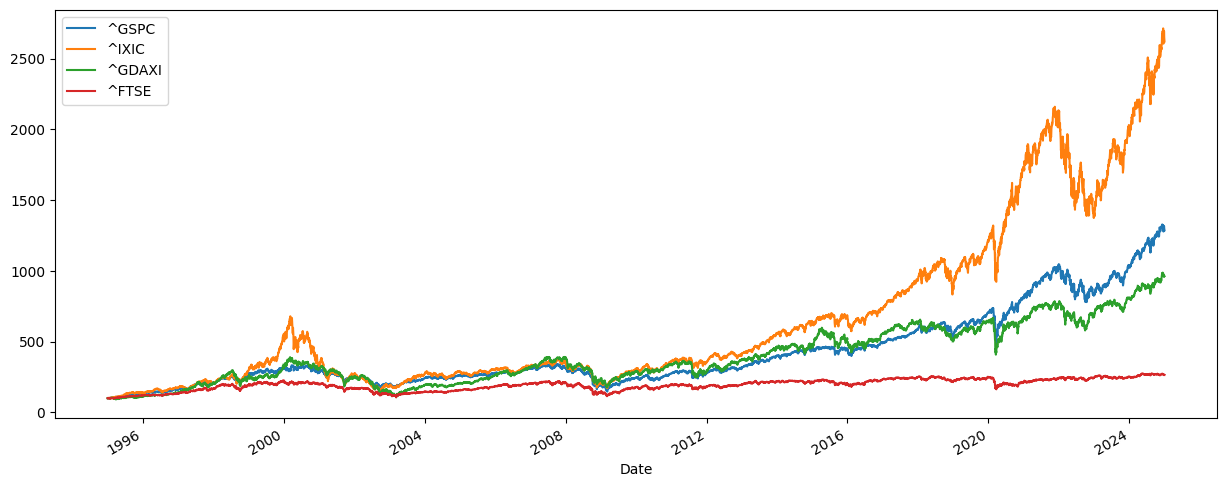

In [7]:
(ind_data / ind_data.iloc[0] *100).plot(figsize= (15,6))
plt.show()

Agora vamos calcular o retorno simples dos indices

In [8]:
ind_returns = (ind_data/ ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-12-23,0.007287,0.009824,-0.001809,0.002239
2024-12-24,0.011043,0.013471,NaN,0.004233
2024-12-26,-0.000406,-0.000538,NaN,NaN
2024-12-27,-0.011056,-0.014901,NaN,NaN
2024-12-30,-0.010702,-0.011928,-0.003762,-0.003533


Agora calcular os retornos anuais.

In [9]:
annaal_ind_return = ind_returns.mean() * 250
annaal_ind_return

^GSPC     0.102271
^IXIC     0.137530
^GDAXI    0.089181
^FTSE     0.045452
dtype: float64

O resultado dos retornos anuais reflete a análise do grafico temporal, onde todos os indices foram positivos, mesmo com algumas quedas de 1955 até 2024.

Agora vamos comparar o preço de fechamento de algumas empresas, com o indice S&500 e indice Dow Jones.

Para tal, precisamos baixar outra base de dados, com o preço de fechamente da 'PG', '^GSPC','^DJI'

In [13]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros
import numpy as np
import matplotlib.pyplot as plt

tickers = ['PG', '^GSPC','^DJI']
data_2 = pd.DataFrame()

for t in tickers:
    data_2[t]= yf.download(t, start='1995-01-01')['Close']

print(data_2.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG       ^GSPC         ^DJI
Date                                         
1995-01-03  7.441164  459.109985  3838.479980
1995-01-04  7.381519  460.709991  3857.649902
1995-01-05  7.277136  460.339996  3850.919922
1995-01-06  7.292047  460.679993  3867.409912
1995-01-09  7.262220  460.829987  3861.350098


Vamos ver as ultimas 5 linhas do data_2

In [14]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2024-12-23,168.110001,5974.069824,42906.949219
2024-12-24,168.940002,6040.040039,43297.031250
2024-12-26,170.160004,6037.589844,43325.800781
2024-12-27,169.529999,5970.839844,42992.210938
2024-12-30,167.089996,5906.939941,42573.730469


Vamos normalizar os dados. 

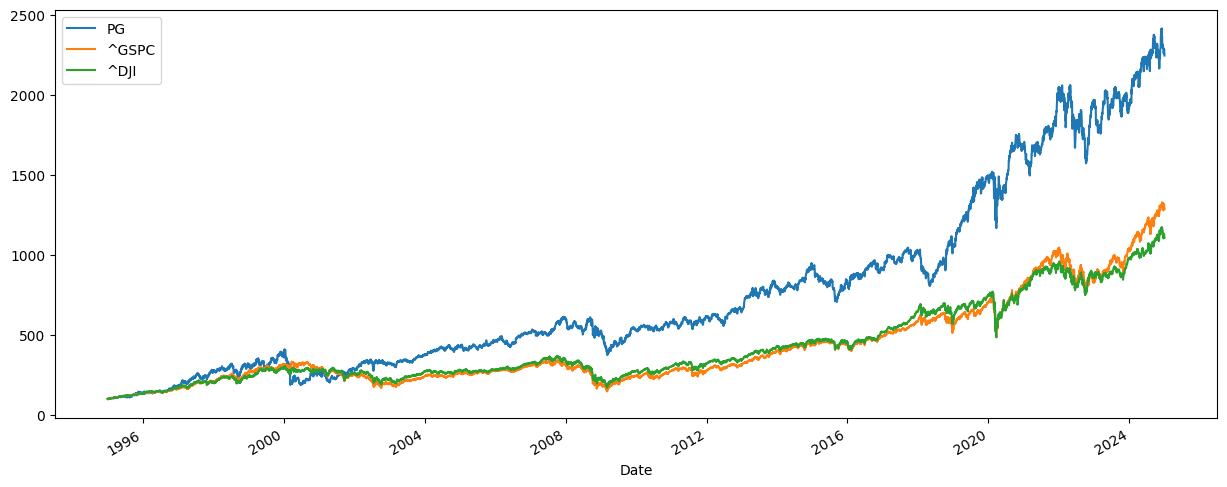

: 

In [ ]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,6))
plt.show()

O que fizemos acima, e uma comparação da ação com o indice de mercados de ações.

### Proximo tópico é calcular o risco de um Ativo em Python. 

### Variância (\(\sigma^2\)):

\[
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2
\]

Onde:
- \(x_i\) = Valor individual da variável
- \(\bar{x}\) = Média dos valores
- \(N\) = Número total de valores

---

### Desvio Padrão (\(\sigma\)):

\[
\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}
\]


Baixando os dados a partir de 2007, pois em determinadas datas não existem dados da ação "BEI.DE"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf #Para baixar os dados finaceiros.

tickers = ['PG','BEI.DE']
sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = yf.download(t, start= '2007-01-01')['Close']

print(sec_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   PG     BEI.DE
Date                            
2007-01-03  38.616375  41.022568
2007-01-04  38.323208  41.291916
2007-01-05  37.994114  40.443066
2007-01-08  38.077904  40.451225
2007-01-09  37.982147  39.537075


Visualizar os ultimos dados. 

In [5]:
print(sec_data.tail())

                    PG      BEI.DE
Date                              
2024-12-23  168.110001  123.300003
2024-12-24  168.940002         NaN
2024-12-26  170.160004         NaN
2024-12-27  169.529999  123.199997
2024-12-30  167.089996  124.000000


Primeiro calcular os retorno logaritimos

In [6]:
sec_return = np.log(sec_data/sec_data.shift(1))
sec_return

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002203,0.000202
2007-01-09,-0.002518,-0.022858
...,...,...
2024-12-23,0.000297,0.003656
2024-12-24,0.004925,NaN
2024-12-26,0.007196,NaN


Agora vamos calcular a media e o desvio padrão de cada ação.

### PG

Retorno médio diário

In [7]:
sec_return['PG'].mean()

0.0003235106358144156

retorno médio anual

In [8]:
sec_return['PG'].mean()*250

0.0808776589536039

Desvio padrão diário

In [9]:
sec_return['PG'].std()

0.011613924091727198

dm anual

In [10]:
sec_return['PG'].std()*250**0.5

0.18363226351080128

### BEIERSDORF

Retorno medio diário

In [13]:
sec_return['BEI.DE'].mean()

0.00023243697128967736

Retorno medio anual

In [14]:
sec_return['BEI.DE'].mean()*250

0.05810924282241934

In [15]:
sec_return['BEI.DE'].std()

0.013402029659255096

In [16]:
sec_return['BEI.DE'].std() * 250 **0.5

0.21190469496188213

Outra forma de visualizar pode ser deixar elas juntas.

In [17]:
print (sec_return ['PG'].mean() *250)
print (sec_return['BEI.DE'].mean()*250)


0.0808776589536039
0.05810924282241934


Podemos usar tambem os cochetes duplos para separar por arrays, lembrando que apenas um cochete não funciona por conta das dimensões de matrizes da arrays. Voce pode tentar com colchetes simples e verá que tem erro. 

In [21]:
sec_return[['PG','BEI.DE']].mean() * 250

PG        0.080878
BEI.DE    0.058109
dtype: float64

In [25]:
sec_return[['PG','BEI.DE']].std() * 250 ** 0.5

PG        0.183632
BEI.DE    0.211905
dtype: float64

Agora iremos calcula a covariancia entre os ativos.

A fórmula para calcular a correlação de Pearson entre duas variáveis \(X\) e \(Y\) é:

\[
r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}
\]

Onde:
- \( r \) é a correlação entre \( X \) e \( Y \),
- \( X_i \) e \( Y_i \) são os valores individuais das variáveis \( X \) e \( Y \),
- \( \bar{X} \) e \( \bar{Y} \) são as médias de \( X \) e \( Y \), respectivamente,
- A soma é realizada sobre todos os pares de dados de \( X \) e \( Y \).

A correlação de Pearson mede a força e a direção da relação linear entre duas variáveis. O valor de \( r \) varia de \(-1\) a \(1\), onde:
- \( r = 1 \) indica uma correlação positiva perfeita,
- \( r = -1 \) indica uma correlação negativa perfeita,
- \( r = 0 \) indica nenhuma correlação linear.


Calculando a Variancia DIÁRIA

In [26]:
PG_var = sec_return['PG'].var()
PG_var

0.00013488323280840144

In [27]:
BEI_var = sec_return['BEI.DE'].var()
BEI_var

0.00017961439898755326

Calculando a variancia anual

In [28]:
PG_var = sec_return['PG'].var() * 250
PG_var

0.03372080820210036

In [29]:
BEI_var = sec_return['BEI.DE'].var() *250
BEI_var

0.04490359974688832

Agora calcular as covariancias das ações

Diária

In [32]:
cov_matrix = sec_return.cov()
cov_matrix

,PG,BEI.DE
PG,0.000135,0.000041
BEI.DE,0.000041,0.000180


Covariancia anual

In [33]:
cov_matrix_a = sec_return.cov() *250
cov_matrix

,PG,BEI.DE
PG,0.000135,0.000041
BEI.DE,0.000041,0.000180


Agora calcular a correlação entre elas

Lembrete, que esta não é uma correlação entre o preço dessas ações. 

In [34]:
corr_matrix = sec_return.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.265342
BEI.DE,0.265342,1.000000


Não caia na armadilha de anualizar a tabela de correlação. 

#### Agora vamos calcular o risco de multiplos Ativos em um Portfólio. 

In [35]:
weights = np.array([0.5,0.5])

Variancia do portfolio

In [37]:
pfolio_var = np.dot(weights.T, np.dot(sec_return.cov() * 250, weights))
pfolio_var

0.024829868642083697

Volatividade do portifolio

In [39]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_return.cov() * 250, weights))) ** 0.5
              
pfolio_vol

0.15757496197709742

In [41]:
print (str(round(pfolio_vol,5)*100) + '%')

15.756999999999998%


### Agora vamos calcular o risco sistematico de uma carteira.


In [42]:
weights = np.array([0.5,0.5])

O risco diversificado de uma carteira de investimentos pode ser calculado usando a seguinte fórmula:

\[
\sigma_p = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}}
\]

Onde:
- \( \sigma_p \) é o desvio padrão da carteira (risco total),
- \( w_i \) e \( w_j \) são os pesos dos ativos \(i\) e \(j\) na carteira,
- \( \sigma_{ij} \) é a covariância entre os ativos \(i\) e \(j\),
- \( n \) é o número total de ativos na carteira.

A covariância \( \sigma_{ij} \) é dada por:

\[
\sigma_{ij} = \text{Cov}(r_i, r_j)
\]

Onde:
- \( r_i \) e \( r_j \) são os retornos dos ativos \(i\) e \(j\).

Em uma versão simplificada para uma carteira de dois ativos, a fórmula se torna:

\[
\sigma_p = \sqrt{w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \text{Cov}(r_1, r_2)}
\]

Onde:
- \( w_1 \) e \( w_2 \) são os pesos dos ativos 1 e 2 na carteira,
- \( \sigma_1 \) e \( \sigma_2 \) são os desvios padrão dos ativos 1 e 2,
- \( \text{Cov}(r_1, r_2) \) é a covariância entre os retornos dos dois ativos.

Essa fórmula ajuda a calcular o risco de uma carteira levando em consideração a diversificação entre os ativos.


In [47]:
float(PG_var_a)

0.04490359974688832

In [49]:
PG_var_a = sec_return['PG'].var() * 250
PG_var_a

0.03372080820210036

In [50]:
BEI_var_a = sec_return['BEI.DE'].var() * 250
BEI_var_a

0.04490359974688832

Risco diversificado

In [51]:
dr= pfolio_var - (weights[0] **2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.0051737666548365285

In [52]:
print(str(round(dr*100,3))+ '%')

0.517%


Risco não diversificado

In [53]:
n_dr_1= pfolio_var - dr
n_dr_1

0.019656101987247168

In [54]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEI_var_a)
n_dr_2

0.019656101987247168

Por fim, vamos testar se ambos são iguais

In [55]:
n_dr_1 == n_dr_2

True

### Agora vamos iniciar a analise de regressão

Vamos fazer uma regrassão simples do banco de dados disponivel no curso. 


Primeiro baixar os dados diretamente do GitHub

In [10]:
import pandas as pd

# Link direto para o arquivo
housing_url = "https://raw.githubusercontent.com/JoseHeraldo/analisefinanceira/main/Housing.xlsx"

# Ler o arquivo Excel diretamente
df = pd.read_excel(housing_url)


# Mostrar as primeiras linhas
print(df.head())

# Informações gerais
print(df.info())


   House Price  House Size (sq.ft.) State  Number of Rooms  \
0      1116000                 1940    IN                8   
1       860000                 1300    IN                5   
2       818400                 1420    IN                6   
3      1000000                 1680    IN                7   
4       640000                 1270    IN                5   

   Year of Construction  
0                  2002  
1                  1992  
2                  1987  
3                  2000  
4                  1995  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   House Price           20 non-null     int64 
 1   House Size (sq.ft.)   20 non-null     int64 
 2   State                 20 non-null     object
 3   Number of Rooms       20 non-null     int64 
 4   Year of Construction  20 non-null     int64 
dtypes: int64(4), o

Tambem se pode salvar o arquivo em excel numa pasta. No exemplo abaixo

E depois voce  pode salvar o mesmo em um novo df. 

In [4]:
import requests

# Link direto para o arquivo
housing_url = "https://raw.githubusercontent.com/JoseHeraldo/analisefinanceira/main/Housing.xlsx"

# Fazer o download do arquivo
response = requests.get(housing_url)
with open("Housing.xlsx", "wb") as file:
    file.write(response.content)

print("Arquivo baixado e salvo como 'Housing.xlsx'")


Arquivo baixado e salvo como 'Housing.xlsx'


### Agora vamos as analises de regressão. 

In [12]:
df

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


Para facilitar a regressão vamos trabalhar apenas com duas colunas. House Price e House Size

In [20]:
print(df.columns)


Index(['House Price', 'House Size (sq.ft.)', 'State', 'Number of Rooms',
       'Year of Construction'],
      dtype='object')


In [21]:
selected_columns = df[['House Price', 'House Size (sq.ft.)']]
print(selected_columns.head())


   House Price  House Size (sq.ft.)
0      1116000                 1940
1       860000                 1300
2       818400                 1420
3      1000000                 1680
4       640000                 1270


Agora elaborar a equação. De uma forma bem explicativa


In [22]:
x = selected_columns['House Size (sq.ft.)']
y = selected_columns['House Price']

In [23]:
x

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [24]:
y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

Definidos quem sao X e Y. 
Vamos analisar o grafico de dispersão


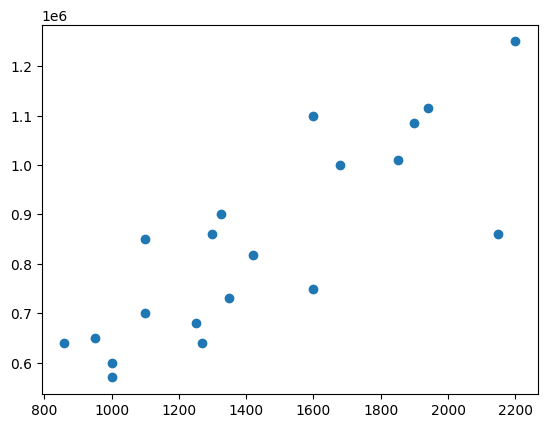

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()


Podemos mellhorar o ajustamento do grafico

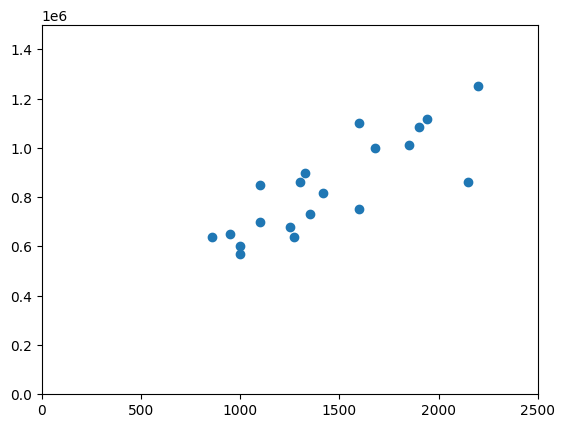

In [30]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.show()

Melhorando ainda mais o grafico, e deixando de forma profissional, ou seja, demonstrando a relação entre o tamanho de uma casa e seu preço. 

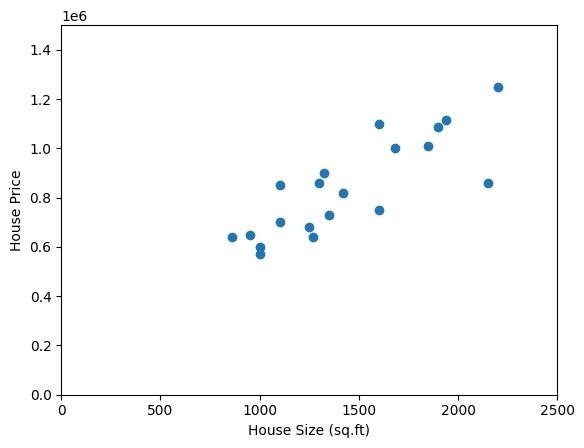

In [31]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

### Calculando o alfa, beta e o R quadrado

In [34]:
import statsmodels.api as sm

# Supondo que X e y sejam definidos corretamente
X1 = sm.add_constant(x)  # Adiciona uma constante (intercepto) ao modelo
reg = sm.OLS(y, X1).fit()  # Ajusta o modelo de regressão
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           8.13e-06
Time:                        18:59:04   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9

Alpha, Beta e R²

In [36]:
from scipy.stats import linregress

# Supondo que x e y já estão definidos corretamente
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Exibindo os resultados
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"Standard Error: {std_err}")


Slope: 401.91628631922595
Intercept: 260806.2360560964
R-squared: 0.678279986579124
Standard Error: 65.24299510636492


Agora realizaremos o calcula para encontrar a fronteira eficiente de Markowitz

Vamos utilizar a base de dados abaixo

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Ativos financeiros que você deseja baixar
assets = ['PG', '^GSPC']

# DataFrame para armazenar os dados
pf_data = pd.DataFrame()

# Baixando os dados para cada ativo
for a in assets:
    pf_data[a] = yf.download(a, start='2010-01-01')['Close']  # Corrigido para usar 'start' em vez de 'stats'

# Exibindo as primeiras linhas dos dados baixados
print(pf_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   PG        ^GSPC
Date                              
2010-01-04  39.432022  1132.989990
2010-01-05  39.444916  1136.520020
2010-01-06  39.257816  1137.140015
2010-01-07  39.044914  1141.689941
2010-01-08  38.993305  1144.979980


<Axes: xlabel='Date'>

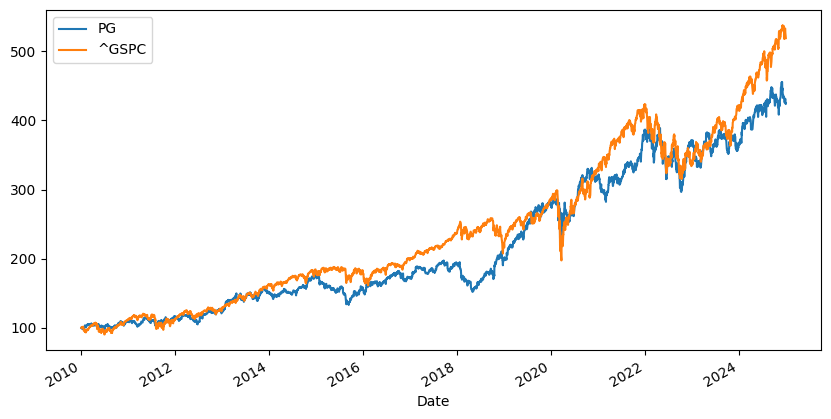

In [40]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [41]:
log_return = np.log(pf_data / pf_data.shift(1))

Media anual do log 

In [42]:
log_return.mean() *250

PG       0.095899
^GSPC    0.109129
dtype: float64

Covanriancia

In [43]:
log_return.cov() * 250

,PG,^GSPC
PG,0.028941,0.015758
^GSPC,0.015758,0.029640


In [44]:
log_return.corr()

,PG,^GSPC
PG,1.000000,0.538033
^GSPC,0.538033,1.000000


In [46]:
num_assets = len(assets)
num_assets

2

O metodo abaixo cria dois pesos aleatorios

In [50]:
arr = np.random.random(2)
arr

array([0.37156786, 0.2549583 ])

In [49]:
arr[0] + arr[1]

1.7533938598076984

Solução para realizar o loop parar faze ambos serem iguais a 1. 

In [52]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.58759786, 0.41240214])

In [53]:
weights[0] + weights[1]

1.0

Formula para o retorno esperado do portfilio.

In [54]:
np.sum(weights * log_return.mean()) *250

0.10135475816038399

Agora calcular a expectatica variancia.

In [55]:
np.dot(weights.T, np.dot(log_return.cov() *250, weights))

0.022670556069923027

Exéctativa de volatividade do portifolio

In [56]:
np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights)))

0.15056744691307955

Realizar um loop que se repeti 1000 meses

In [94]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights *log_return.mean()) * 250 )
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.101017794763112,
  0.10135998740688827,
  0.10418998214982994,
  0.10070509061248481,
  0.09942427564510109,
  0.09859503771012851,
  0.10027657334237576,
  0.10336742743827723,
  0.10746801986827816,
  0.10097863918501693,
  0.10245770555888045,
  0.09890398065065402,
  0.10251282176333681,
  0.10201236448940273,
  0.1074005994425038,
  0.10330388253119777,
  0.10096936782910967,
  0.10608813363894952,
  0.10550343172787575,
  0.09772661239514975,
  0.10164775803350967,
  0.10436498431270434,
  0.0960505685349173,
  0.09994198987242928,
  0.10250709434985306,
  0.10208931565941282,
  0.10326487380514168,
  0.10287228729971883,
  0.10495391815924653,
  0.10117717135101466,
  0.10334065336183919,
  0.10507829547669947,
  0.10039153546985712,
  0.10152630502928915,
  0.10624703187258729,
  0.10080821658596602,
  0.09799674803715094,
  0.10073433264420369,
  0.10266823937442951,
  0.10127934608673923,
  0.10006317131234546,
  0.1071836354105535,
  0.1070118651793807,
  0.1023842783041

Abaixo podemos converter o codigo acima em arrays

In [95]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights *log_return.mean()) * 250 )
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.10552908, 0.10137087, 0.10358044, 0.10564337, 0.10396241,
        0.09873281, 0.10742759, 0.1018004 , 0.10239843, 0.09932396,
        0.10298001, 0.10453   , 0.10512632, 0.10281253, 0.10768008,
        0.09632363, 0.10110463, 0.10602762, 0.10502157, 0.10260757,
        0.10391189, 0.10062025, 0.10670573, 0.10108624, 0.09715395,
        0.10402783, 0.10166167, 0.10281336, 0.10857048, 0.10499535,
        0.1047385 , 0.10202812, 0.10397391, 0.10232462, 0.09924455,
        0.09927992, 0.10507131, 0.10034978, 0.09843017, 0.10399576,
        0.10741091, 0.10139475, 0.10281977, 0.10393924, 0.10353479,
        0.10518481, 0.10412058, 0.10332192, 0.1076376 , 0.09738558,
        0.10684194, 0.10602392, 0.10297731, 0.10168057, 0.10581233,
        0.09852175, 0.10627275, 0.10758698, 0.09999187, 0.10026973,
        0.10422023, 0.09715088, 0.10436578, 0.09640037, 0.10562836,
        0.10668552, 0.10595338, 0.10494965, 0.10317289, 0.10100669,
        0.10006549, 0.1079271 , 0.10243284, 0.10

Agora vamos plotar o resultado em um grafico

Precisamos aplicar esta correção antes de plotar os dados

In [99]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [100]:
portfolios.head()

,Return,Volatility
0,0.105529,0.155208
1,0.101371,0.150551
2,0.103580,0.150853
3,0.105643,0.155576
4,0.103962,0.151411


In [101]:
portfolios.tail()

,Return,Volatility
995,0.104854,0.153281
996,0.108785,0.170109
997,0.102783,0.150165
998,0.103466,0.150714
999,0.097858,0.160093


Agora vamos plotar os graficos

Fronteira eficiente.

In [1]:
portfolios.plot(x='Volatility', y='return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

NameError: name 'portfolios' is not defined

### Agora vamos calcular o CAPM

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Ativos financeiros que você deseja
tickers = ['PG', '^GSPC']

# DataFrame para armazenar os dados
data = pd.DataFrame()

# Baixando os dados para cada ativo
for t in tickers:
    data[t] = yf.download(t, start='2012-01-01', end='2016-12-31')['Close']  

# Exibindo as primeiras linhas dos dados baixados
print(data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   PG        ^GSPC
Date                              
2012-01-03  45.882767  1277.060059
2012-01-04  45.862183  1277.300049
2012-01-05  45.669933  1281.060059
2012-01-06  45.560089  1277.810059
2012-01-09  45.752316  1280.699951


In [122]:
sec_return = np.log(data/data.shift(1))


In [123]:
cov = sec_return.cov() * 250 
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [124]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010078093976989675

In [125]:
market_var = sec_return['^GSPC'].var() * 250
market_var

0.016361631002308474

Calcular o Beta

In [126]:
PG_beta = cov_with_market / market_var
PG_beta

0.6159590065053875

O resultado indica que esse valor é uma ação defensiva.

A formula do CAPM

### Fórmula do CAPM (Capital Asset Pricing Model)

O CAPM é expresso pela seguinte fórmula:

\[
E(R_i) = R_f + \beta_i (E(R_m) - R_f)
\]

#### Onde:
- \(E(R_i)\): Retorno esperado do ativo \(i\).
- \(R_f\): Taxa livre de risco.
- \(\beta_i\): Beta do ativo \(i\), que mede sua sensibilidade ao risco de mercado.
- \(E(R_m)\): Retorno esperado do mercado.
- \(E(R_m) - R_f\): Prêmio pelo risco de mercado.


In [127]:
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.05579795032526938

### Fórmula do Índice de Sharpe

O Índice de Sharpe é dado pela fórmula:

\[
S = \frac{E(R_p) - R_f}{\sigma_p}
\]

#### Onde:
- \(S\): Índice de Sharpe.
- \(E(R_p)\): Retorno esperado do portfólio.
- \(R_f\): Taxa livre de risco.
- \(\sigma_p\): Desvio padrão dos retornos do portfólio (medida de risco).


In [128]:
Sharpe = (PG_er - 0.025) / (sec_return['PG'].std(0)*250 **0.5)
Sharpe

0.2155812802011218

### Simulações de Monte Carlo

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
rev_m = 170
rev_stdev =20
iterations = 1000

In [139]:
rev = np.random.normal(rev_m,rev_stdev,iterations)
rev

array([167.41980429, 155.51970337, 194.9186263 , 191.73109135,
       154.35219831, 155.16295704, 148.62959585, 163.27158184,
       159.07204789, 190.01382761, 187.72605237, 135.10412374,
       157.91349265, 152.91311109, 192.29910226, 168.81039543,
       181.24594985, 170.18786653, 171.09309177, 177.13353868,
       154.63419608, 201.81273971, 180.31648311, 170.41263782,
       167.10247633, 162.73568811, 172.39654906, 160.01484824,
       166.10279515, 169.51003865, 156.31144473, 185.79437338,
       160.24219283, 174.44734126, 179.14165991, 170.01939854,
       146.78706164, 145.31214208, 168.52920297, 172.18217453,
       182.41500896, 158.47848233, 156.66133358, 159.45645334,
       160.51402033, 209.73054727, 180.36885665, 194.73288678,
       141.9156463 , 176.99149493, 147.87966178, 141.93413261,
       172.98033558, 165.60540147, 150.4338782 , 193.05630798,
       130.9966496 , 181.07019024, 185.50638567, 131.64275146,
       151.29932896, 198.25460038, 161.89394583, 171.65

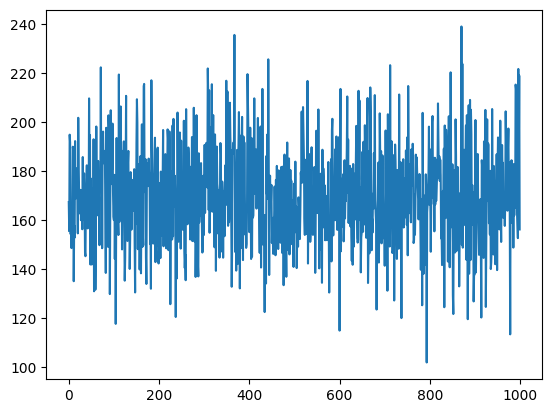

In [142]:
plt.Figure(figsize=(15,6))
plt.plot(rev)
plt.show()

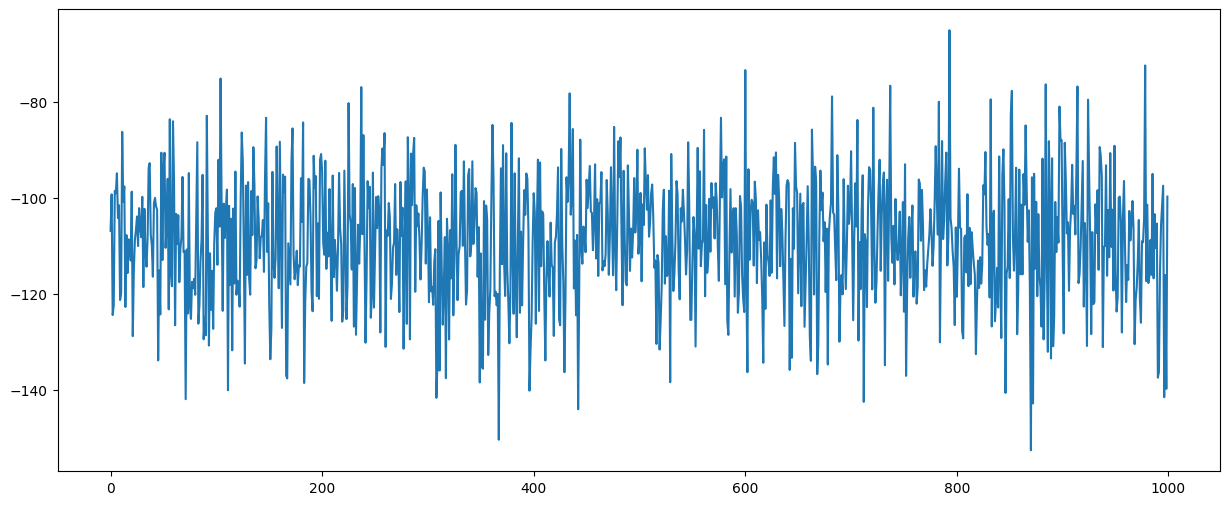

In [147]:
COGS = - (rev * np.random.normal(0.6,0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [148]:
COGS.mean()

-108.7494467740794

In [149]:
COGS.std()

12.943067156685657

Agora vamos calcular o lucro bruto.

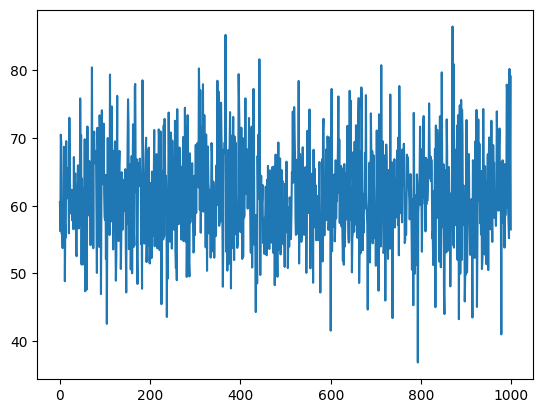

In [150]:
Gross_Profit = rev + COGS
Gross_Profit

plt.Figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [151]:
max(Gross_Profit)

86.46139614334012

In [152]:
min(Gross_Profit)

36.8638436018594

In [153]:
Gross_Profit.mean()

61.60706192745792

In [154]:
Gross_Profit.std()

7.332307092188699

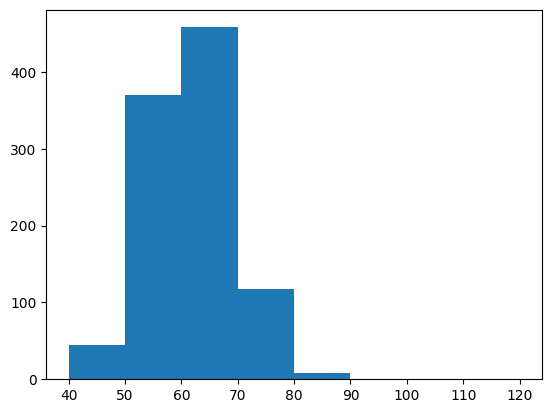

: 

In [ ]:
plt.Figure(figsize=(16,10))
plt.hist(Gross_Profit, bins = [40,50,60,70,80,90,100,110,120])
plt.show()

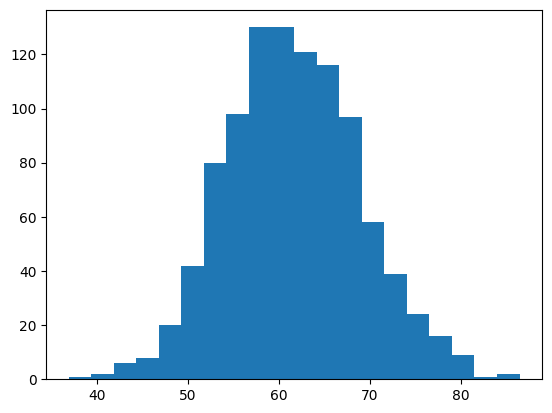

In [156]:
plt.Figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = 20)
plt.show()

Previsão de preço de uma ação.

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf

In [20]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download (ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [21]:
log_returns = np.log(1 + data.pct_change())

In [22]:
log_returns.tail()

,PG
Date,
2024-12-24,0.004925
2024-12-26,0.007196
2024-12-27,-0.003709
2024-12-30,-0.014497
2024-12-31,0.003346


<Axes: xlabel='Date'>

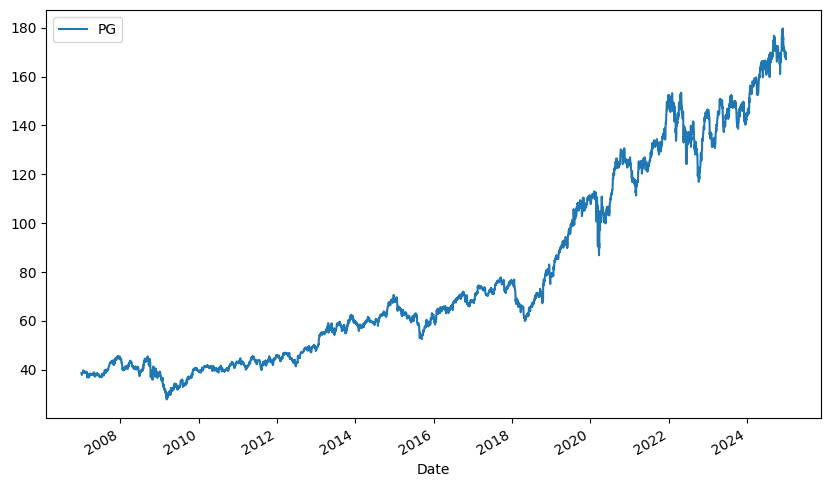

In [23]:
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

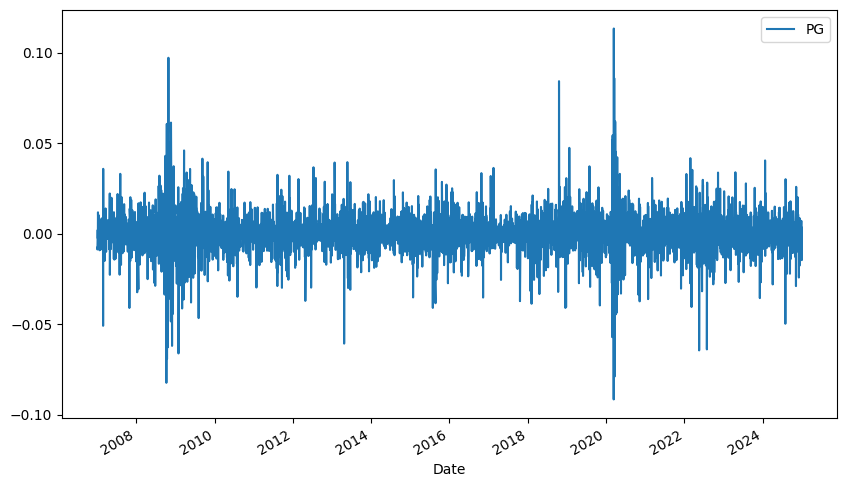

In [25]:
log_returns.plot(figsize=(10, 6))


In [27]:
u = log_returns.mean()
u

PG    0.000324
dtype: float64

In [28]:
var = log_returns.var()
var

PG    0.000135
dtype: float64

In [30]:
drift = u - (0.5 * var)
drift

PG    0.000257
dtype: float64

In [31]:
stdev = log_returns.std()
stdev

PG    0.011613
dtype: float64

Simulação sobre preço futuro de uma empresa.

In [32]:
type(drift)

pandas.core.series.Series

In [33]:
type(stdev)

pandas.core.series.Series

Converter em array

In [34]:
np.array(drift)

array([0.00025675])

In [35]:
drift.values

array([0.00025675])

In [36]:
stdev.values

array([0.01161273])

In [37]:
norm.ppf(0.95)

1.6448536269514722

In [38]:
x = np.random.rand(10,2)
x

array([[0.26765575, 0.85119432],
       [0.74436846, 0.21382703],
       [0.08852779, 0.09502566],
       [0.24592003, 0.6501087 ],
       [0.39129013, 0.54121545],
       [0.96704201, 0.49841941],
       [0.25227636, 0.08239584],
       [0.49915266, 0.38674845],
       [0.171588  , 0.065021  ],
       [0.3488737 , 0.51263931]])

In [39]:
norm.ppf(x)

array([[-0.61991843,  1.04156939],
       [ 0.65687221, -0.79321243],
       [-1.34987658, -1.31042728],
       [-0.68738515,  0.38561395],
       [-0.27595808,  0.10349628],
       [ 1.83899455, -0.00396196],
       [-0.66734353, -1.38913508],
       [-0.00212397, -0.28780383],
       [-0.94790858, -1.51393631],
       [-0.38836303,  0.03168735]])

In [41]:
z= norm.ppf(np.random.rand(10,2))
z

array([[ 0.54253157, -1.4443714 ],
       [ 1.29412185, -1.97460995],
       [-0.64080467, -0.88931955],
       [-0.19578469,  1.01093961],
       [ 0.69362998, -0.01940511],
       [ 1.05843553,  0.44477729],
       [ 0.24280595, -0.00462828],
       [ 1.22846469, -2.58068937],
       [ 0.14711571,  0.0485882 ],
       [-1.28372134, -1.5917702 ]])

In [42]:
t_intervals = 1000
iterations = 10

In [48]:
daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [49]:
daily_return

array([[0.98553612, 1.02182377, 1.01540736, ..., 1.00002019, 0.99643022,
        1.00489271],
       [0.99343432, 0.99981527, 0.97620674, ..., 1.00815771, 1.0102831 ,
        1.009152  ],
       [1.01282066, 0.99075283, 0.99814376, ..., 0.99866023, 1.00467812,
        0.99970671],
       ...,
       [1.01234079, 1.00581388, 1.00117266, ..., 1.0037081 , 0.98910423,
        1.01063295],
       [0.98036283, 0.97455239, 1.0165865 , ..., 1.00604533, 0.99930282,
        0.98581563],
       [0.97847282, 1.01255602, 1.01940573, ..., 0.99477006, 1.00794256,
        1.0131066 ]])

Agora vamos criar uma lista de preços

In [50]:
S0 = data.iloc[-1]
S0

PG    167.649994
Name: 2024-12-31 00:00:00, dtype: float64

In [52]:
price_list = np.zeros_like(daily_return)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
price_list[0] = S0
price_list

array([[167.6499939, 167.6499939, 167.6499939, ..., 167.6499939,
        167.6499939, 167.6499939],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [54]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_return[t]

price_list

array([[167.6499939 , 167.6499939 , 167.6499939 , ..., 167.6499939 ,
        167.6499939 , 167.6499939 ],
       [166.54925815, 167.619024  , 163.66105426, ..., 169.01763441,
        169.37395622, 169.18432727],
       [168.68452905, 166.06902203, 163.35725939, ..., 168.79119023,
        170.16630827, 169.13470678],
       ...,
       [121.72351685, 222.42193094, 279.1733366 , ..., 224.89577415,
        212.69961062, 223.81948599],
       [119.33321125, 216.76182509, 283.80384608, ..., 226.25534235,
        212.55132122, 220.64474837],
       [116.764304  , 219.48349194, 289.31126599, ..., 225.07204153,
        214.23952301, 223.53665076]])

Plotar o grafico de previsão do preço

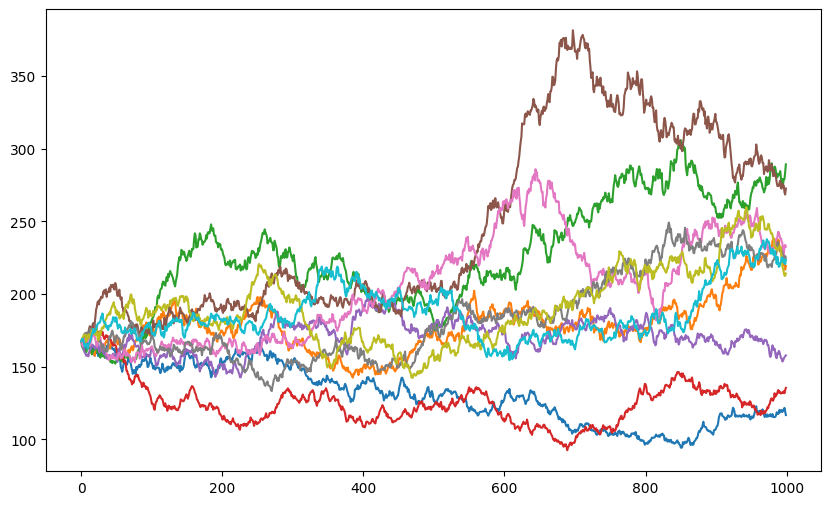

In [55]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

Agora vamos calcular o preço de opção de compra. 
o BLACK-SCHOLES-MERTON

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

In [27]:
def d1 (S, K, r, stdev, T):
    return (np.log(S/K) + (r + stdev ** 2/2) * T) / (stdev * np.sqrt(T))

def d2 (S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev ** 2/2) * T) / (stdev * np.sqrt(T))

In [12]:
norm.cdf(0)

0.5

In [13]:
norm.cdf(0.25)

0.5987063256829237

In [14]:
norm.cdf(0.75)

0.7733726476231317

In [15]:
norm.cdf(9)

1.0

In [33]:
def BSM (S,K,r,stdev,T):
    return (S * norm.cdf(d1(S,K,r,stdev,T)))  - (K * np.exp(- r *T) * norm.cdf(d2(S,K,r,stdev,T)))

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

ticker = 'PG'
data = pd.DataFrame()

data[ticker] = yf.download(ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [18]:
S = data.iloc[-1]
S

PG    167.649994
Name: 2024-12-31 00:00:00, dtype: float64

In [19]:
log_return = np.log(1+ data.pct_change())

In [20]:
stdev = log_return.std() * 250 ** 0.5
stdev

PG    0.183613
dtype: float64

In [24]:
r= 0.025
K = 110.0
T = 1

In [28]:
d1(S,K,r,stdev,T)

PG    2.522992
dtype: float64

In [29]:
d2(S,K,r,stdev,T)

PG    2.339378
dtype: float64

In [34]:
BSM(S,K,r,stdev,T)

PG    60.426649
Name: 2024-12-31 00:00:00, dtype: float64

### Monte Carlo: Discretização de Euler

In [68]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

ticker = 'PG'
data = pd.DataFrame()

data[ticker] = yf.download(ticker, start='2007-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [71]:
log_returns = np.log ( 1 + data.pct_change())

In [72]:
r = 0.025

In [73]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.183613
dtype: float64

In [74]:
type(stdev)

pandas.core.series.Series

In [75]:
stdev = stdev.values
stdev

array([0.18361334])

In [76]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

Trabalhar com a previsão de um ano nos preços

In [77]:
z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(z)
S0 = data.iloc[-1]
S[0] = S0

In [82]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev *delta_t ** 0.5 * z[t])

In [83]:
S

array([[167.6499939 , 167.6499939 , 167.6499939 , ..., 167.6499939 ,
        167.6499939 , 167.6499939 ],
       [165.04606225, 167.03955199, 168.97489576, ..., 167.04293696,
        165.53535535, 168.54911381],
       [162.82270064, 163.14929459, 168.22518541, ..., 166.67794535,
        164.90417834, 173.48998338],
       ...,
       [208.15804202, 157.59672935, 126.92470684, ..., 169.51552154,
        166.41270247, 152.96134457],
       [204.58011469, 161.43573386, 126.77041519, ..., 170.01161924,
        165.21234006, 153.7496594 ],
       [203.13248451, 162.23009534, 126.45383411, ..., 171.98935573,
        165.33979314, 156.75657757]])

In [84]:
S.shape

(251, 10000)

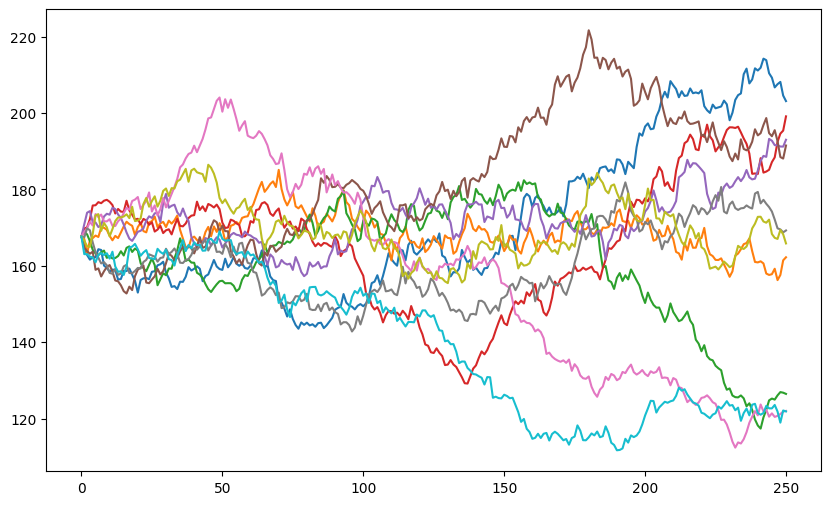

In [85]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

Agora vamos calcular o preço de opção de compra.

In [86]:
p = np.maximum(S[-1] - 110,0)
p

array([93.13248451, 52.23009534, 16.45383411, ..., 61.98935573,
       55.33979314, 46.75657757])

In [88]:
p.shape

(10000,)

In [89]:
c= np.exp( -r * T) * np.sum(p) / iterations
c

60.24434665939849